In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
TickerA='ITSA4.SA'
TickerB='FLRY3.SA'
TickerC='LREN3.SA'
prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

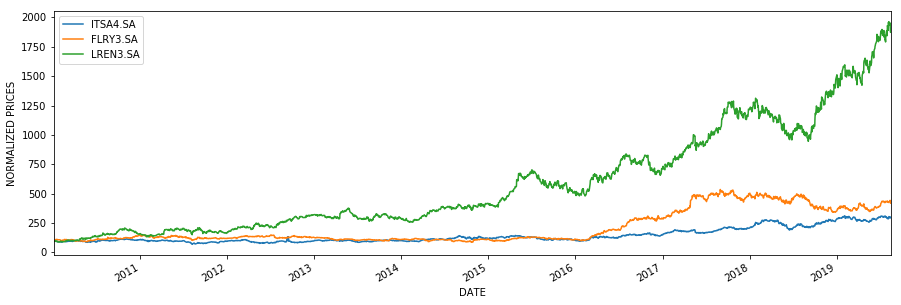

In [9]:
import matplotlib.pyplot as plt
(prices/prices.iloc[0]*100).plot(figsize=(15,5))
plt.ylabel('NORMALIZED PRICES')
plt.xlabel('DATE')
plt.show()

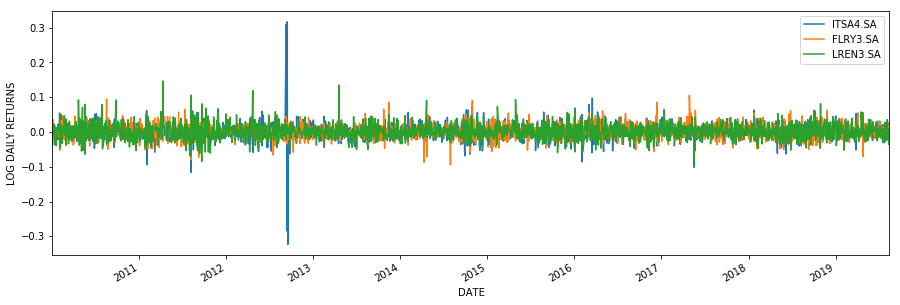

In [5]:
log_returns=np.log(prices/prices.shift(1))
log_returns.plot(figsize=(15,5))
plt.ylabel('LOG DAILY RETURNS')
plt.xlabel('DATE')
plt.show()

In [6]:
log_returns.mean()*250

ITSA4.SA    0.114818
FLRY3.SA    0.152286
LREN3.SA    0.314353
dtype: float64

In [7]:
log_returns.std()

ITSA4.SA    0.022707
FLRY3.SA    0.018882
LREN3.SA    0.021470
dtype: float64

In [8]:
log_returns.corr()

,ITSA4.SA,FLRY3.SA,LREN3.SA
ITSA4.SA,1.000000,0.217133,0.375745
FLRY3.SA,0.217133,1.000000,0.231381
LREN3.SA,0.375745,0.231381,1.000000


In [94]:
import zipfile as z
def read_zip_file(zippath, filename):
    with z.ZipFile(zippath) as myzip:
        with myzip.open(filename, mode='r') as myfile:
            return myfile.read().splitlines()

In [95]:
f = read_zip_file('./Titulos_Negociaveis.zip', 'TITULOS_NEGOCIAVEIS.TXT')

In [109]:
tip_neg_layout = {
    'codneg': {'start':3, 'end':14}
,   'codempr': {'start':15, 'end':18}
,   'codbdi': {'start':19, 'end':21}
,   'descbdi': {'start':22, 'end':81}
,   'isin_p': {'start':82, 'end':93}
,   'isin_po': {'start':94, 'end':105}
,   'codmer': {'start':109, 'end':111}
,   'descmer': {'start':112, 'end':126}
,   'serie': {'start':127, 'end':133}
,   'espec_po': {'start':134, 'end':143}
,   'dtvenc': {'start':144, 'end':153}
,   'preco': {'start':154, 'end':171}
,   'est_opcao': {'start':172, 'end':172}
,   'indmoe': {'start':173, 'end':175}
,   'descmoe': {'start':176, 'end':190}
,   'prot': {'start':191, 'end':193}
}

In [162]:
empr_layout = {
    'codempr': {'start':3, 'end':6}
,   'nmcom': {'start':7, 'end':66}
,   'nmresu': {'start':67, 'end':78}
}

In [165]:
def decode_line(line, layout):
    
    obj = {}
    for k, v in layout.items():
        try:
            obj[k] = str(line[v['start']-1:v['end']],'utf-8').strip() 
        except: 
            obj[k] = line[v['start']-1:v['end']] 

    return obj;
    
    

In [186]:
p = []
e = []
for l in f:
#     if str(l[0:2],'utf-8') == '00':
#         #print('header')
#     if str(l[0:2],'utf-8') == '09':
#         #print('trailler')
    if str(l[0:2],'utf-8') == '01':  #print('DADOS DAS EMPRESAS')
        o = decode_line(l, empr_layout)
        e.append([o['codempr'], o['nmcom'], o['nmresu']])
        
    if str(l[0:2],'utf-8') == '02':
        #print('DADOS DOS TÍTULOS NEGOCIÁVEIS')
        o = decode_line(l, tip_neg_layout)
        if o['codmer'] == '010':
            p.append(o['codneg'] + '\t'+ o['codempr'])  
        
        
save(p,'/media/sf_repo/ativos.tsv')
save(e,'/media/sf_repo/empresas.tsv')




In [177]:
def save(s, f):
    with open(f, 'w') as filehandle:
        for listitem in s:
            filehandle.write('%s\n' % listitem)



In [168]:
e

[{'codempr': 'AALL',
  'nmcom': 'AMERICAN AIRLINES GROUP INC.',
  'nmresu': 'AMERICAN AIR'},
 {'codempr': 'AALR',
  'nmcom': 'CENTRO DE IMAGEM DIAGNOSTICOS S.A.',
  'nmresu': 'ALLIAR'},
 {'codempr': 'AAPL', 'nmcom': 'APPLE INC.', 'nmresu': 'APPLE'},
 {'codempr': 'ABBV', 'nmcom': 'ABBVIE INC.', 'nmresu': 'ABBVIE'},
 {'codempr': 'ABCB', 'nmcom': 'BCO ABC BRASIL S.A.', 'nmresu': 'ABC BRASIL'},
 {'codempr': 'ABCP',
  'nmcom': 'FDO INV IMOB GRAND PLAZA SHOPPING',
  'nmresu': 'FII ABC IMOB'},
 {'codempr': 'ABEV', 'nmcom': 'AMBEV S.A.', 'nmresu': 'AMBEV S/A'},
 {'codempr': 'ABTT', 'nmcom': 'ABBOTT LABORATORIES', 'nmresu': 'ABBOTT'},
 {'codempr': 'ACNB', 'nmcom': 'ACCENTURE PLC', 'nmresu': 'ACCENTURE'},
 {'codempr': 'ADBE', 'nmcom': 'ADOBE INC', 'nmresu': 'ADOBE INC'},
 {'codempr': 'ADHM',
  'nmcom': 'ADVANCED DIGITAL HEALTH MEDICINA PREVENTIVA S.A.',
  'nmresu': 'ADVANCED-DH'},
 {'codempr': 'ADPR',
  'nmcom': 'AUTOMATIC DATA PROCESSING INC',
  'nmresu': 'AUTOMATIC DT'},
 {'codempr': 'AFLT',
 

In [156]:
p

[['AALL34', 'AALL'],
 ['AALR3', 'AALR'],
 ['AAPL34', 'AAPL'],
 ['ABBV34', 'ABBV'],
 ['ABCB4', 'ABCB'],
 ['ABCP11', 'ABCP'],
 ['ABEV3', 'ABEV'],
 ['ABTT34', 'ABTT'],
 ['ACNB34', 'ACNB'],
 ['ADBE34', 'ADBE'],
 ['ADHM3', 'ADHM'],
 ['ADPR34', 'ADPR'],
 ['AFLT3', 'AFLT'],
 ['AGRO3', 'AGRO'],
 ['AHEB3', 'AHEB'],
 ['AHEB5', 'AHEB'],
 ['AHEB6', 'AHEB'],
 ['AIGB34', 'AIGB'],
 ['ALEF3B', 'ALEF'],
 ['ALMI11', 'ALMI'],
 ['ALPA3', 'ALPA'],
 ['ALPA4', 'ALPA'],
 ['ALSO3', 'ALSO'],
 ['ALUP3', 'ALUP'],
 ['ALUP4', 'ALUP'],
 ['ALUP11', 'ALUP'],
 ['ALZR11', 'ALZR'],
 ['AMAR3', 'AMAR'],
 ['AMGN34', 'AMGN'],
 ['AMZO34', 'AMZO'],
 ['ANCR11B', 'ANCR'],
 ['ANIM3', 'ANIM'],
 ['APER3', 'APER'],
 ['APTI3', 'APTI'],
 ['APTI4', 'APTI'],
 ['APTV34', 'APTV'],
 ['AQLL11', 'AQLL'],
 ['ARFI11B', 'ARFI'],
 ['ARMT34', 'ARMT'],
 ['ARNC34', 'ARNC'],
 ['ARZZ3', 'ARZZ'],
 ['ATCR11', 'ATCR'],
 ['ATOM3', 'ATOM'],
 ['ATSA11', 'ATSA'],
 ['ATTB34', 'ATTB'],
 ['ATVI34', 'ATVI'],
 ['AVGO34', 'AVGO'],
 ['AVON34', 'AVON'],
 ['AWII34',

In [68]:
len(f)

22594